A linear model makes a prediction by computing a weighted sum of input features plus a coonstant called the bias term also called the intercept term.

y_hat=theta.x   => this is a scalar value
y_hat=(theta transpose)x   => Single cell matrix.

In ML vectors are often represented as column vectors

Training a model means setting its parameters so that the model best fits the training set.To train a linear regression model we need to find the value of theta that minimizes the MSE (cost function).

Its not necessary that the cost function and performance measure should be same. Learning algorithms will often optimize a different loss function during training than the performance measure used to evaluate the final model. A good training loss is easy to optimize and strongly correlated with the metric. eg: classifiers are often trained using a cost function such as log loss but evaluated using precision/recall.

MSE=(Sigma i=1 to n (y_hat_i-y_i)**2)/n

In [ ]:
## Generating some linear-looking data
import numpy as np
np.random.seed(42)
m=100
X=2*np.random.rand(m,1)
y=4+3*X+np.random.randn(m,1)  ## last term refers to noise

## rand is for uniform distribution in the interval [0.0,1)
## randn is for normal distribution - mean 0 variance 1
## The normal distribution is bell-shaped, which means value near the center of the distribution are more likely to occur as opposed to values on the tails of the distribution.
## eg: birth weight of newborn babies
## The uniform distribution is rectangular-shaped, which means every value in the distribution is equally likely to occur.
## eg: rolling a dice

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_,lin_reg.coef_)

[4.21509616] [[2.77011339]]


In [ ]:
X_new=np.array([[0],[2]])
lin_reg.predict(X_new)

## Time complexity is about O(n**2)

array([[4.21509616],
       [9.75532293]])

In [ ]:
## Linear regression using stochastic GD with Scikit-Learn - SGDRegressor class defaults to optimizing MSE cost function
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-5,penalty=None,eta0=0.01,n_iter_no_change=100,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

# Polynomial regression

Adding powers of each feature as new features, then training a linear model on this extended set of features

In [ ]:
## Generating non linear data : y=ax**2+bx+c+(some noise)
np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)


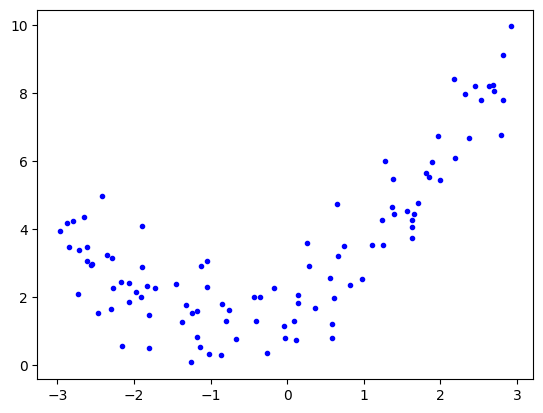

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X,y,"b.")

In [ ]:
## Adding square of each feature as new feature using Scikit-Learn's PolynomialFeatures class
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [ ]:
## Now we can fit a LinearRegression model to this extended training data.
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Above result means model estimates,

y_hat=0.56x1**2+0.93x1+1.78

Original was y=0.5*X**2+X+2+np.random.randn(m,1)

PolynomialFeatures also adds all combinations of features upto the given degree. eg:  2 features with degree 2 then a,b,a**2,b**2,a**2b,b**2a etc.

## Underfitting and Overfitting

Underfitting - Performs poorly on training and validation set.

Solution -

1. Use better model

2. Come up with better features.

Overfitting - Model performs well on the training data but generalizes poorly according to cross validation metrics.

Solution -

1. Feed it more training data until validation error reaches the training error

2. Regularization

Learning curve - Plots of the model's training error and validation error as a function of the training iteration. Scikit-Learn learning_curve(). It trains and evaluates model using cross validation. It retrains the model on growing subsets. Function returns training sizes, training and validation scores for each size.

A model's generalization error can be expressed as the sum of 3 very different errors:

1. Bias - Its due to wrong assumptions eg: Assuming data is linear when its quadratic. High bias => underfitting

2. Variance - Its due to model's sensitivity to small variations in the training data. eg: high degree polynomial model . High variance => overfitting

3. Irreducible error - Due to noisiness of the data itself. Cleanup the data (fix data sources like broken sensors, outlier removal etc.)

Increasing model's complexity => increase variance decrease bias

Reducing model's complexity => increase bias reduce variance

This is bias/variance trade-off.

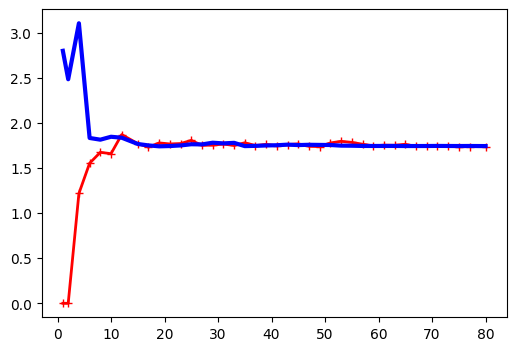

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

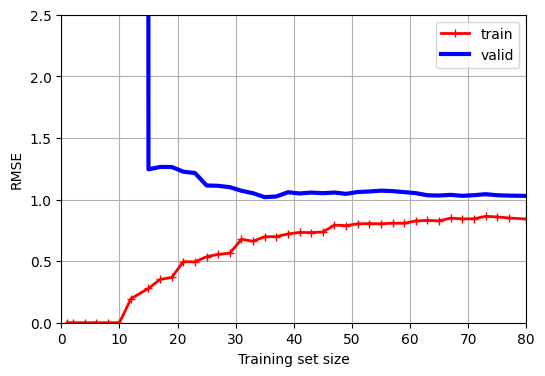

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

# Regularized linear models (Regularize => constrain the model)

-> Important to scale the data as its sensitive to scale of input features.

->Regularization term should only be added to cost function during training. Once trained we should use unregularized MSE  to evaluate model's performance.

-> For a polynomial model => Reduce the number of polynomial degrees

-> For a linear model => Constraining the weights

**Regularized linear models (3 different ways to constrain the weights) - **

**1. Ridge regression**

Regularization term - alpha/m sigma i=1 to n thetai**2 is added to MSE.

This keeps the model weights as small as possible.

alpha=0 => linear rgression
alpha=very large => all weights end up very close to 0 and result is a flat line going through data's mean.

Ridge regression cost function,J(theta)=MSE(theta) + alpha/m sigma i=1 to n thetai**2 = square(l2 norm of weight vector) multiplied by alpha/m

Bias term (theta0) is not regularized

Ridge regression can be performed by computing a closed form equation (Scikit Learn) or by performing gradient descent.

**2. Lasso Regression - least absolute shrinkage and selector operator regression**

Lasso regression cost function,J(theta)=MSE(theta) + 2*alpha sigma i=1 to n abs(thetai) =l1 norm multiplied by 2*alpha

It tends to eliminate the weights of the least important features ie. set them to zero.

It automatically performs feature selection and outputs a sparse model with few non zero feature weights.

**3. ElasticNet Regression**

Regularization term is a weighted sumof both ridge and lasso's regularization terms.

J(theta)=MSE(theta)+r*lasso_term+(1-r)*ridge_term

r=0 => elasticnet==ridge

r=1 => elasticnet==lasso

**What to use when ?**

Ridge is a good default.

If we suspect that only a few features are useful, prefer lasso or elasticnet.

Elasticnet is preferred over lasso especially when no of features > no: of training instances or when several features are strongly correlated.


In [ ]:
## Closed form equation
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.82899748]])

In [ ]:
## Using SGD
sgd_reg=SGDRegressor(penalty="l2",alpha=0.1/m,tol=None,max_iter=1000,eta0=0.01,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

## For SGD, penalty="l1"

array([4.77621741])

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)  ## l1_ratio is the ix ratio r
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.78114505])

# Early Stopping

Another way of regularizing iterative learning algorithms such a sgradient descent to stop training as soon as the validation error reaches a minimum. Also called beautiful free lunch.

In [ ]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)  ## Copies both model's hyper parameters and learned parameters

best_model

SGDRegressor(eta0=0.002, penalty=None, random_state=42)